## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (15, 8)

print("✅ Libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries imported successfully!
📅 Analysis Date: 2025-11-21 19:41:00


## 2. Configuration and Data Loading

In [2]:
# Directories
PROCESSED_DATA_DIR = '../../data/processed'
FIGURES_DIR = '../../outputs/figures'
os.makedirs(FIGURES_DIR, exist_ok=True)

# Ticker lists
TICKERS = {
    'indices': ['GSPC', 'IXIC', 'DJI'],
    'stocks': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA'],
    'crypto': ['BTC_USD', 'ETH_USD']
}

ALL_TICKERS = [ticker for tickers in TICKERS.values() for ticker in tickers]

print(f"📂 Processed data directory: {PROCESSED_DATA_DIR}")
print(f"📂 Figures directory: {FIGURES_DIR}")
print(f"📊 Total tickers to analyze: {len(ALL_TICKERS)}")

📂 Processed data directory: ../../data/processed
📂 Figures directory: ../../outputs/figures
📊 Total tickers to analyze: 10


In [3]:
# Load all processed data
print("📥 Loading processed data...\n")

data = {}

for ticker in ALL_TICKERS:
    try:
        filepath = os.path.join(PROCESSED_DATA_DIR, f"{ticker}_processed.csv")
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        data[ticker] = df
        print(f"✅ {ticker:10s} - {len(df):,} rows loaded")
    except Exception as e:
        print(f"❌ {ticker:10s} - Error: {str(e)}")

print(f"\n✅ Loaded {len(data)} datasets successfully")

📥 Loading processed data...

✅ GSPC       - 2,514 rows loaded
✅ IXIC       - 2,514 rows loaded
✅ DJI        - 2,514 rows loaded
✅ AAPL       - 2,514 rows loaded
✅ MSFT       - 2,514 rows loaded
✅ GOOGL      - 2,514 rows loaded
✅ AMZN       - 2,514 rows loaded
✅ TSLA       - 2,514 rows loaded
✅ BTC_USD    - 3,651 rows loaded
✅ ETH_USD    - 2,608 rows loaded

✅ Loaded 10 datasets successfully


## 3. Basic Statistical Analysis

In [4]:
# Compute comprehensive statistics
print("📊 Computing Statistical Metrics...\n")

stats_summary = []

for ticker, df in data.items():
    returns = df['Returns'].dropna()
    
    # Calculate statistics
    stats_dict = {
        'Ticker': ticker,
        'Mean': returns.mean(),
        'Median': returns.median(),
        'Std': returns.std(),
        'Min': returns.min(),
        'Max': returns.max(),
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Q1': returns.quantile(0.25),
        'Q3': returns.quantile(0.75),
        'IQR': returns.quantile(0.75) - returns.quantile(0.25),
    }
    
    # Test for normality (Jarque-Bera test)
    jb_stat, jb_pvalue = stats.jarque_bera(returns)
    stats_dict['JB_Stat'] = jb_stat
    stats_dict['JB_pValue'] = jb_pvalue
    stats_dict['Is_Normal'] = 'No' if jb_pvalue < 0.05 else 'Yes'
    
    stats_summary.append(stats_dict)

stats_df = pd.DataFrame(stats_summary)
print(stats_df.to_string(index=False))

# Save statistics
stats_df.to_csv(os.path.join(PROCESSED_DATA_DIR, '_eda_statistics.csv'), index=False)
print(f"\n💾 Statistics saved to {PROCESSED_DATA_DIR}/_eda_statistics.csv")

📊 Computing Statistical Metrics...

 Ticker     Mean   Median      Std       Min      Max  Skewness  Kurtosis        Q1       Q3      IQR      JB_Stat  JB_pValue Is_Normal
   GSPC 0.000483 0.000639 0.011232 -0.119841 0.093828 -0.528408 14.591989 -0.003773 0.005756 0.009530 22325.006309        0.0        No
   IXIC 0.000654 0.001068 0.013444 -0.123213 0.093460 -0.451651  7.330793 -0.005020 0.007538 0.012558  5688.676523        0.0        No
    DJI 0.000408 0.000625 0.011049 -0.129265 0.113650 -0.556712 21.138602 -0.003887 0.005457 0.009343 46739.807080        0.0        No
   AAPL 0.001091 0.001001 0.017932 -0.128647 0.119808 -0.003561  5.311309 -0.007329 0.010144 0.017472  2940.618473        0.0        No
   MSFT 0.001085 0.000958 0.017098 -0.147390 0.142168  0.074670  7.807659 -0.006728 0.009779 0.016507  6358.590383        0.0        No
  GOOGL 0.000949 0.001240 0.017937 -0.116342 0.162584  0.240604  6.695694 -0.007515 0.009548 0.017063  4698.421514        0.0        No
   AMZN 0.00

## 4. Price Evolution Visualization

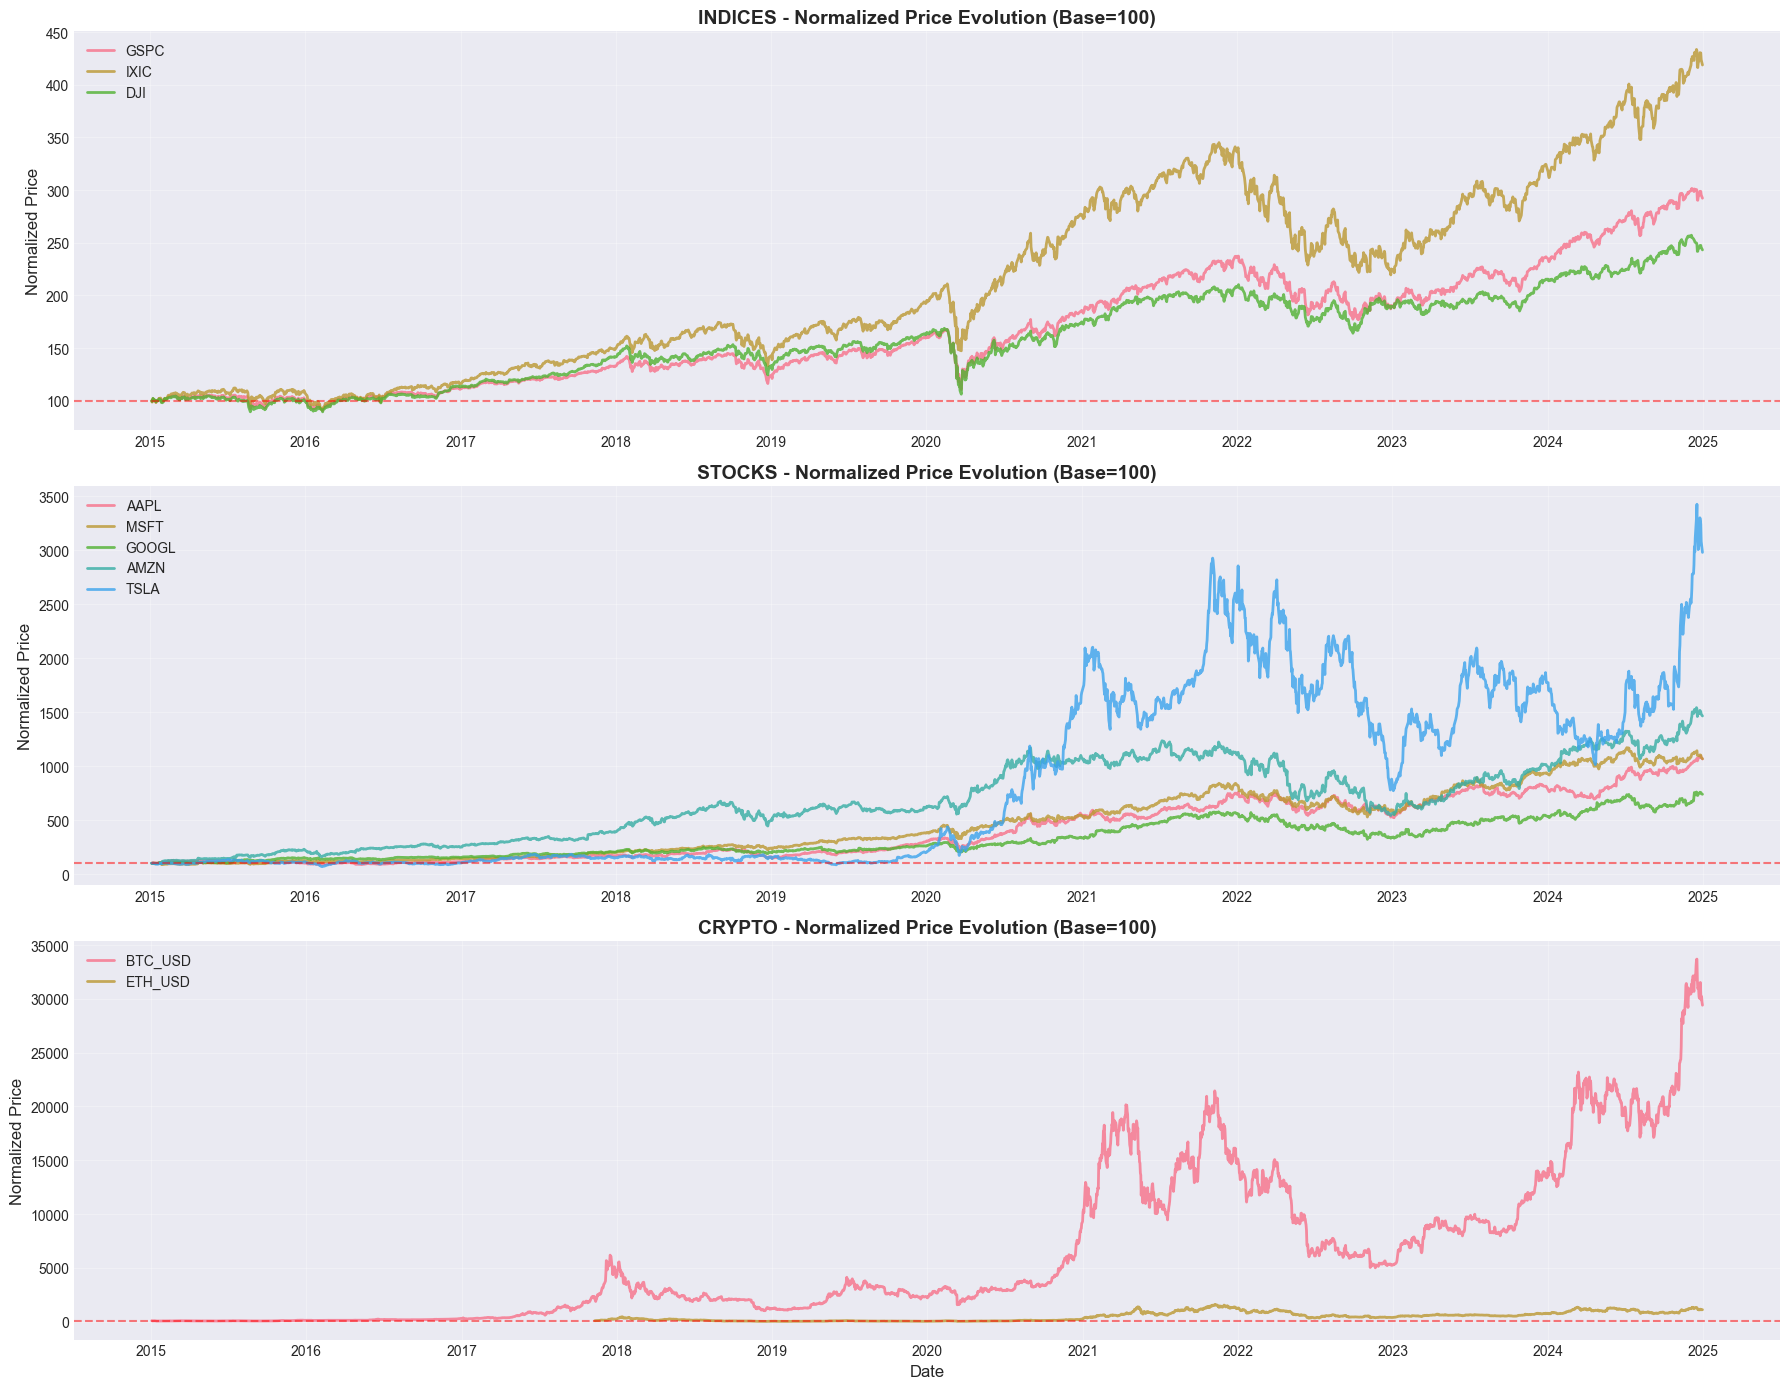

✅ Normalized price visualization saved


In [5]:
# Plot normalized price evolution
fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# Normalize prices to 100 at start date for comparison
for idx, (category, tickers) in enumerate(TICKERS.items()):
    ax = axes[idx]
    
    for ticker in tickers:
        if ticker in data:
            df = data[ticker]
            # Normalize to 100 at start
            normalized = (df['Close'] / df['Close'].iloc[0]) * 100
            ax.plot(normalized.index, normalized, label=ticker, linewidth=2, alpha=0.8)
    
    ax.set_title(f'{category.upper()} - Normalized Price Evolution (Base=100)', 
                 fontsize=14, fontweight='bold')
    ax.set_ylabel('Normalized Price', fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Base')

axes[2].set_xlabel('Date', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '03_normalized_prices.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Normalized price visualization saved")

## 5. Correlation Analysis

📊 Computing correlation matrix...

Common trading days: 1794
Date range: 2017-11-10 00:00:00 to 2024-12-30 00:00:00



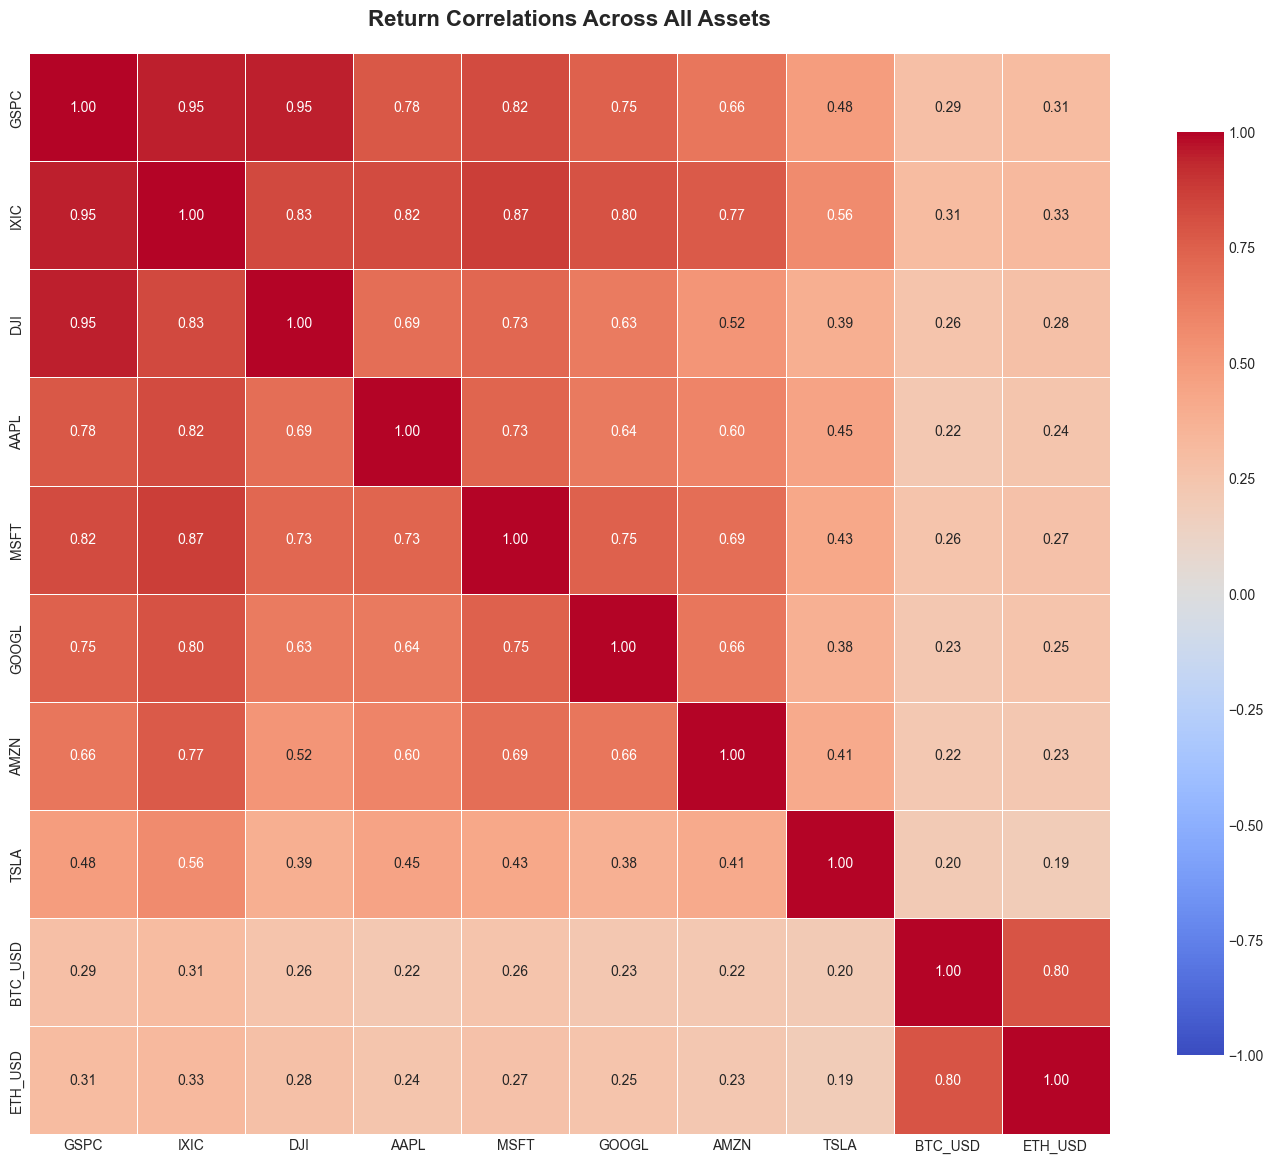

✅ Correlation matrix visualization saved

🔗 Strongest Positive Correlations:
GSPC       <-> DJI       :  0.952
GSPC       <-> IXIC      :  0.948
IXIC       <-> MSFT      :  0.869
IXIC       <-> DJI       :  0.832
GSPC       <-> MSFT      :  0.824
IXIC       <-> AAPL      :  0.822
IXIC       <-> GOOGL     :  0.799
BTC_USD    <-> ETH_USD   :  0.795
GSPC       <-> AAPL      :  0.777
IXIC       <-> AMZN      :  0.769


In [6]:
# Create correlation matrix for returns
print("📊 Computing correlation matrix...\n")

# Align all data to common dates
returns_dict = {}
for ticker, df in data.items():
    returns_dict[ticker] = df['Returns']

# Create returns dataframe
returns_df = pd.DataFrame(returns_dict)
returns_df = returns_df.dropna()

print(f"Common trading days: {len(returns_df)}")
print(f"Date range: {returns_df.index.min()} to {returns_df.index.max()}\n")

# Compute correlation matrix
corr_matrix = returns_df.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=0.5, cbar_kws={'shrink': 0.8}, ax=ax)
ax.set_title('Return Correlations Across All Assets', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '03_correlation_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation matrix visualization saved")

# Print strongest correlations
print("\n🔗 Strongest Positive Correlations:")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for ticker1, ticker2, corr in corr_pairs[:10]:
    print(f"{ticker1:10s} <-> {ticker2:10s}: {corr:6.3f}")

## 6. Rolling Volatility Analysis

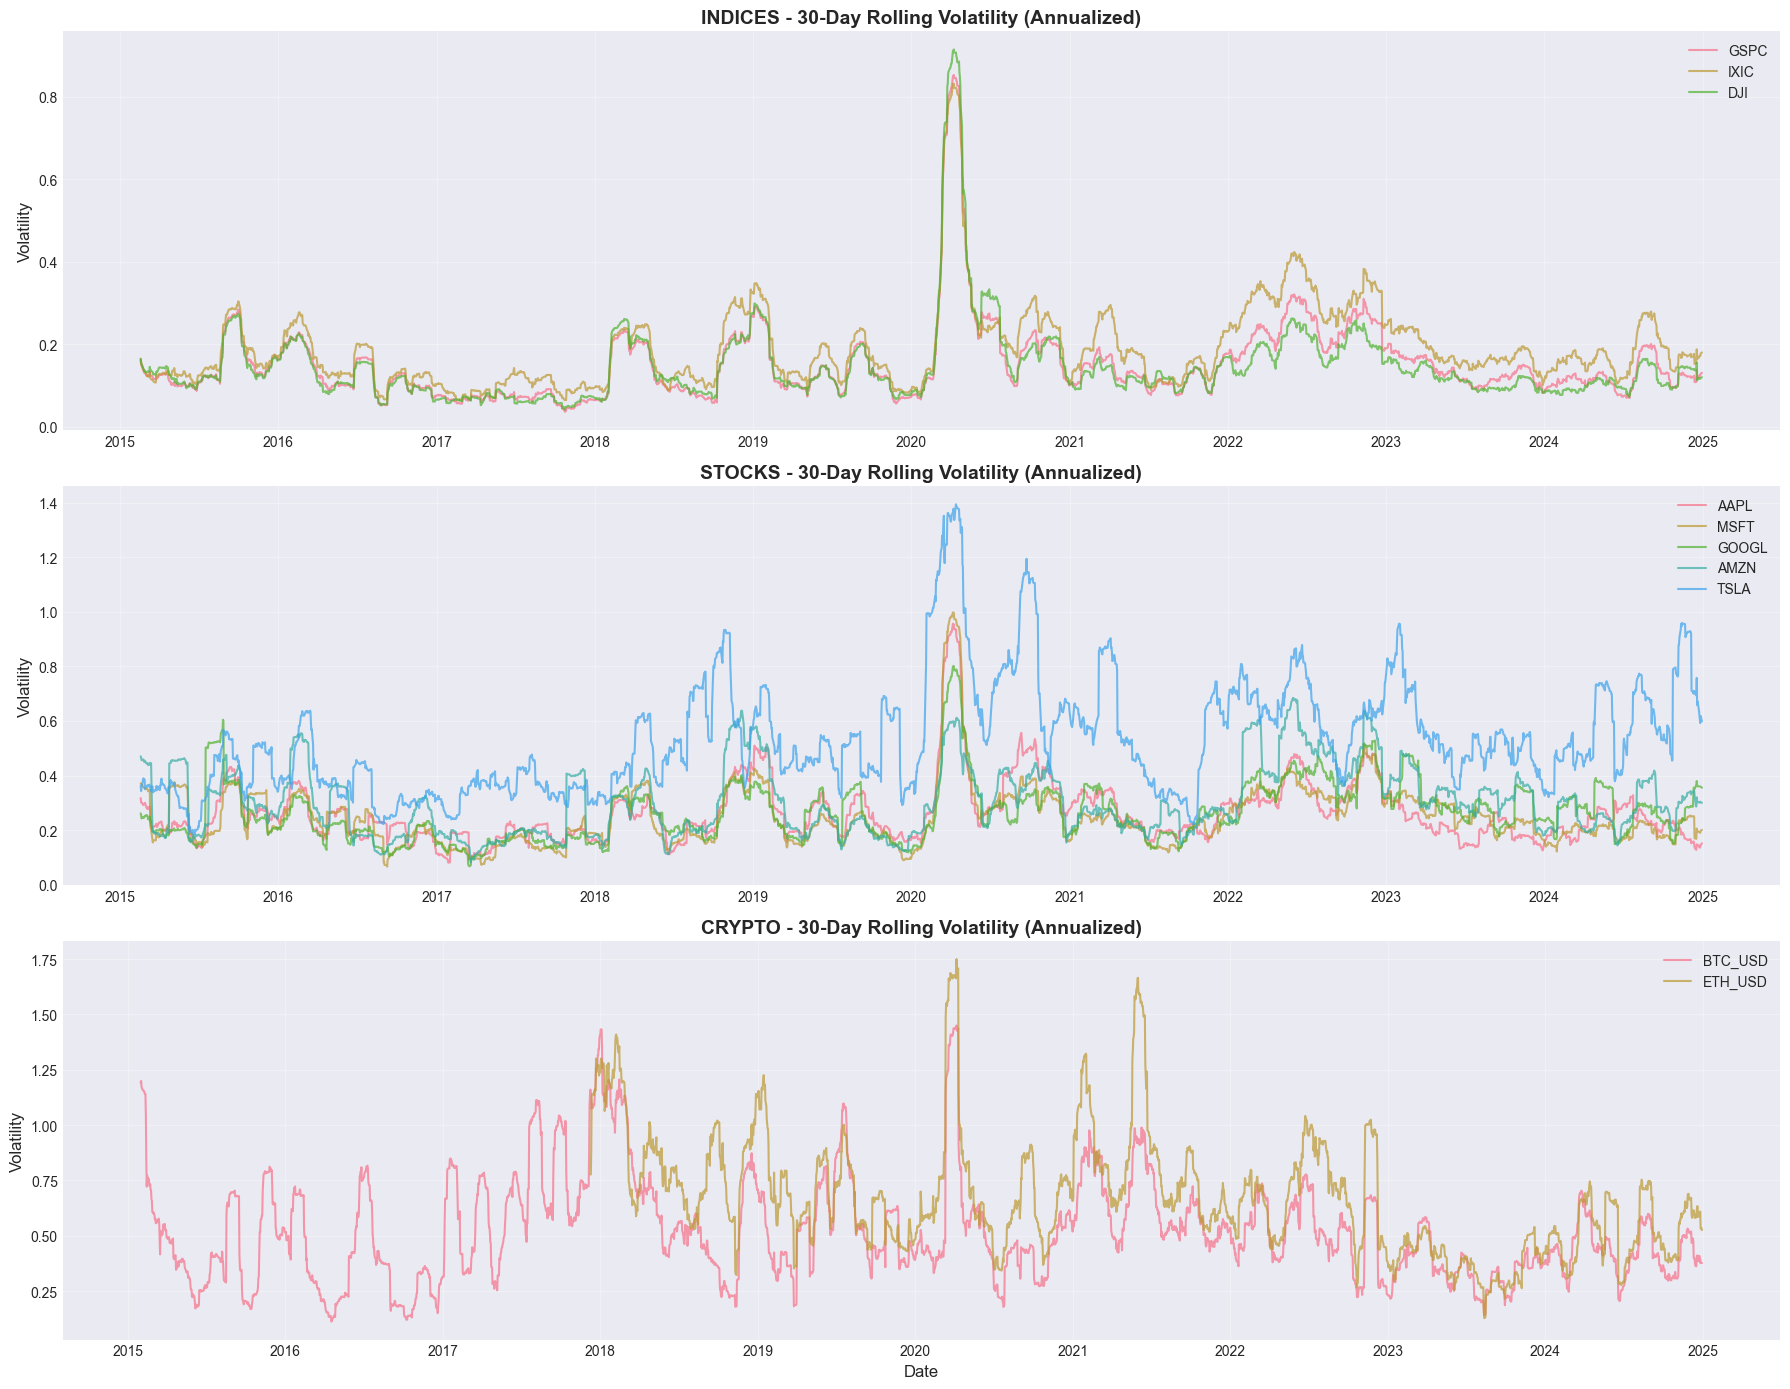

✅ Rolling volatility visualization saved

📊 Volatility Clustering: Notice how high volatility periods cluster together!


In [7]:
# Calculate and plot rolling volatility
window = 30  # 30-day rolling window

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

for idx, (category, tickers) in enumerate(TICKERS.items()):
    ax = axes[idx]
    
    for ticker in tickers:
        if ticker in data:
            df = data[ticker]
            # Calculate rolling volatility (annualized)
            rolling_vol = df['Returns'].rolling(window=window).std() * np.sqrt(252)
            ax.plot(rolling_vol.index, rolling_vol, label=ticker, linewidth=1.5, alpha=0.7)
    
    ax.set_title(f'{category.upper()} - {window}-Day Rolling Volatility (Annualized)', 
                 fontsize=14, fontweight='bold')
    ax.set_ylabel('Volatility', fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

axes[2].set_xlabel('Date', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '03_rolling_volatility.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Rolling volatility visualization saved")
print("\n📊 Volatility Clustering: Notice how high volatility periods cluster together!")

## 7. STL Decomposition

STL (Seasonal-Trend decomposition using LOESS) separates time-series into:
- **Trend**: Long-term progression
- **Seasonal**: Repeating patterns
- **Residual**: Random fluctuations

📊 Performing STL Decomposition for GSPC...



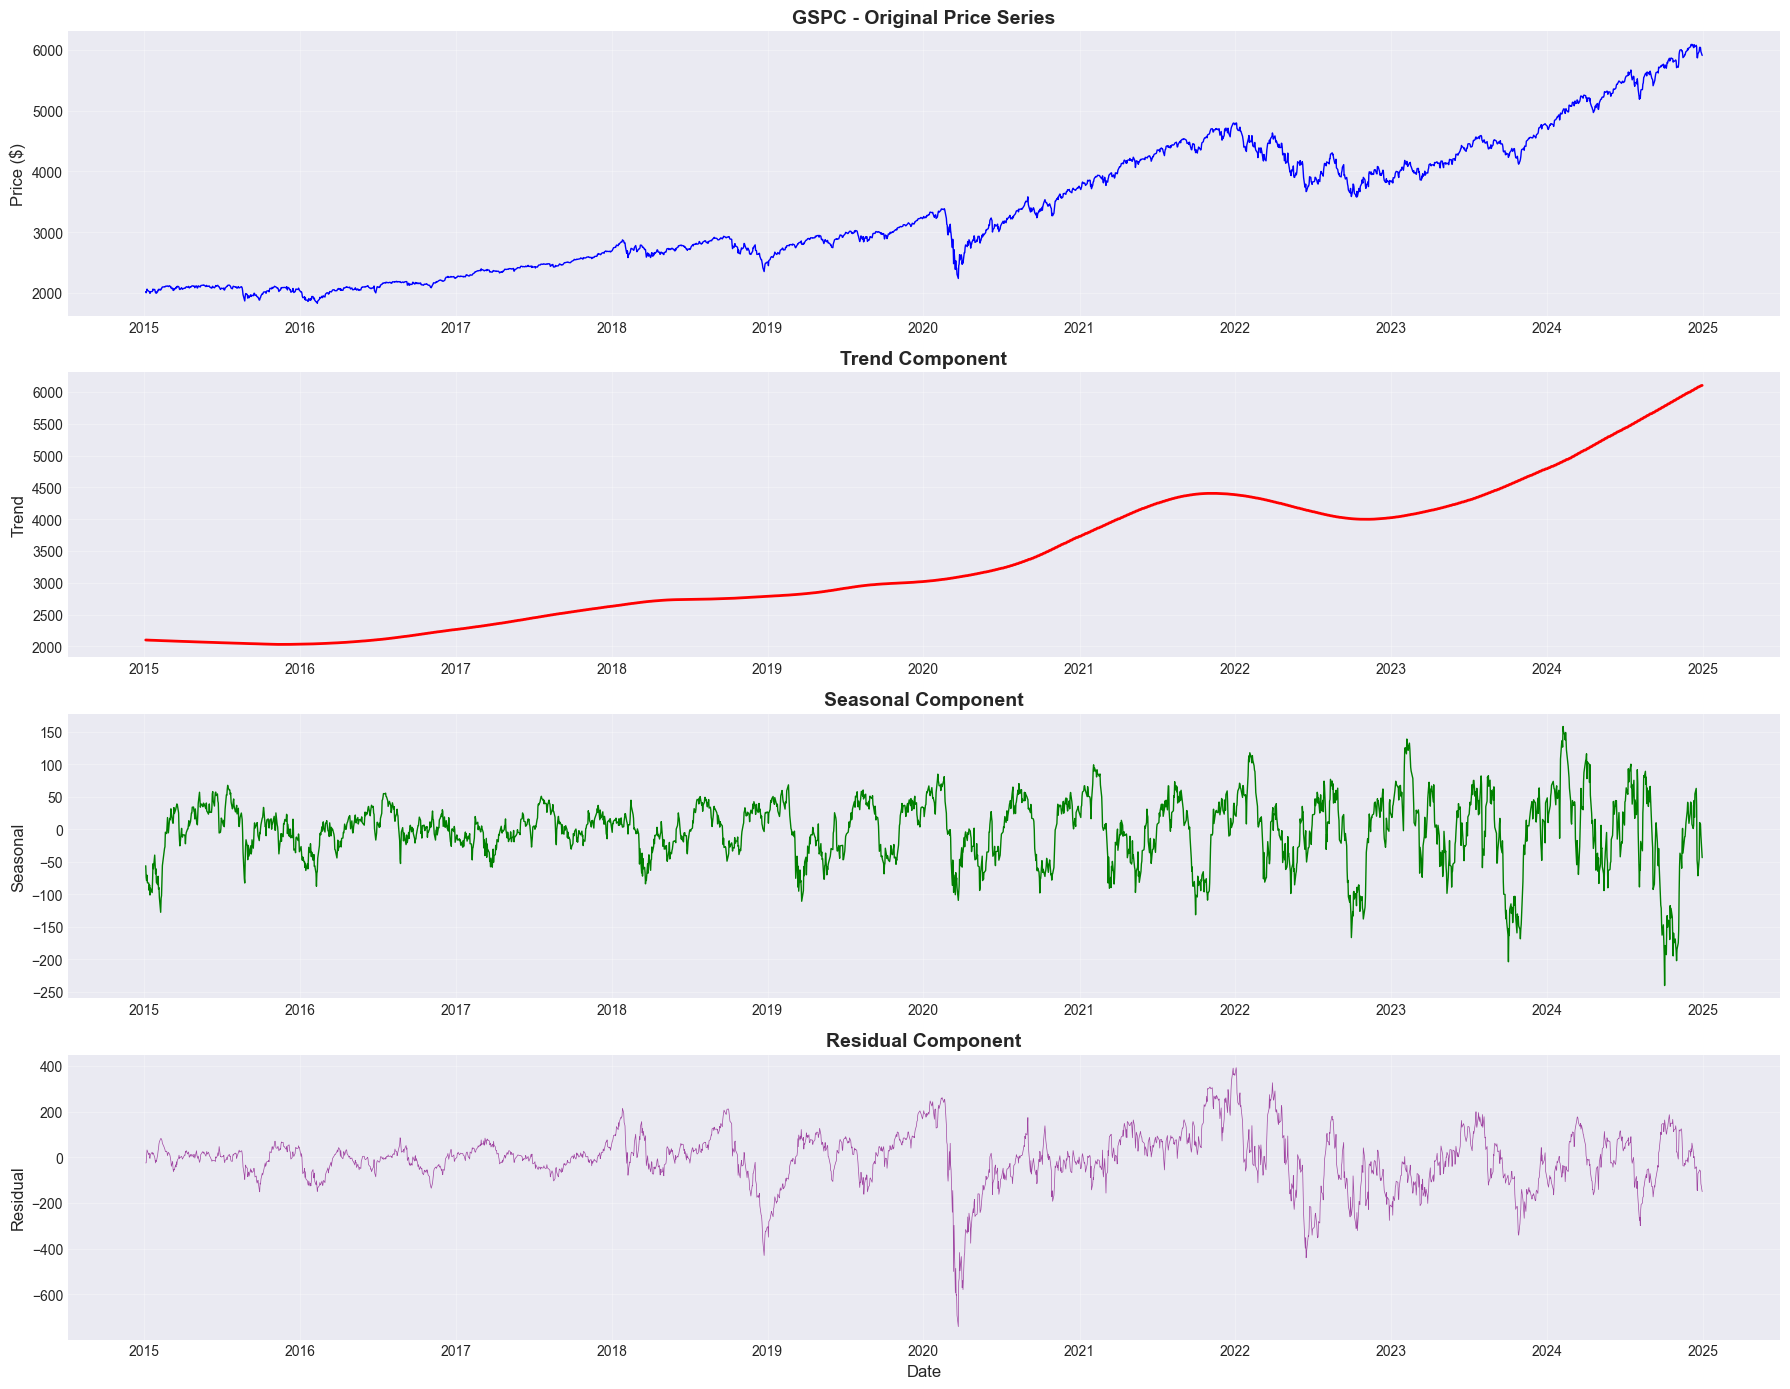

✅ STL decomposition for GSPC saved

📊 Component Statistics:
Trend variance: 1152868.72
Seasonal variance: 2486.54
Residual variance: 14285.39

Strength of Trend: 0.9878
Strength of Seasonality: 0.1844


In [8]:
# Perform STL decomposition for S&P 500
ticker_to_decompose = 'GSPC'

if ticker_to_decompose in data:
    print(f"📊 Performing STL Decomposition for {ticker_to_decompose}...\n")
    
    df = data[ticker_to_decompose]
    
    # Use Close prices for decomposition
    series = df['Close'].dropna()
    
    # Perform STL decomposition
    # Period of 252 (trading days in a year) for annual seasonality
    stl = STL(series, seasonal=13, period=252)  # seasonal=13 for smoothing
    result = stl.fit()
    
    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(18, 14))
    
    # Original
    axes[0].plot(series.index, series, linewidth=1, color='blue')
    axes[0].set_title(f'{ticker_to_decompose} - Original Price Series', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Price ($)', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # Trend
    axes[1].plot(result.trend.index, result.trend, linewidth=2, color='red')
    axes[1].set_title('Trend Component', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Trend', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    # Seasonal
    axes[2].plot(result.seasonal.index, result.seasonal, linewidth=1, color='green')
    axes[2].set_title('Seasonal Component', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Seasonal', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    # Residual
    axes[3].plot(result.resid.index, result.resid, linewidth=0.5, color='purple', alpha=0.7)
    axes[3].set_title('Residual Component', fontsize=14, fontweight='bold')
    axes[3].set_ylabel('Residual', fontsize=12)
    axes[3].set_xlabel('Date', fontsize=12)
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, f'03_stl_decomposition_{ticker_to_decompose}.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ STL decomposition for {ticker_to_decompose} saved")
    
    # Statistics of components
    print(f"\n📊 Component Statistics:")
    print(f"Trend variance: {result.trend.var():.2f}")
    print(f"Seasonal variance: {result.seasonal.var():.2f}")
    print(f"Residual variance: {result.resid.var():.2f}")
    
    # Calculate strength of trend and seasonality
    strength_trend = max(0, 1 - (result.resid.var() / (result.trend + result.resid).var()))
    strength_seasonal = max(0, 1 - (result.resid.var() / (result.seasonal + result.resid).var()))
    
    print(f"\nStrength of Trend: {strength_trend:.4f}")
    print(f"Strength of Seasonality: {strength_seasonal:.4f}")

📊 Performing STL Decomposition for BTC_USD...



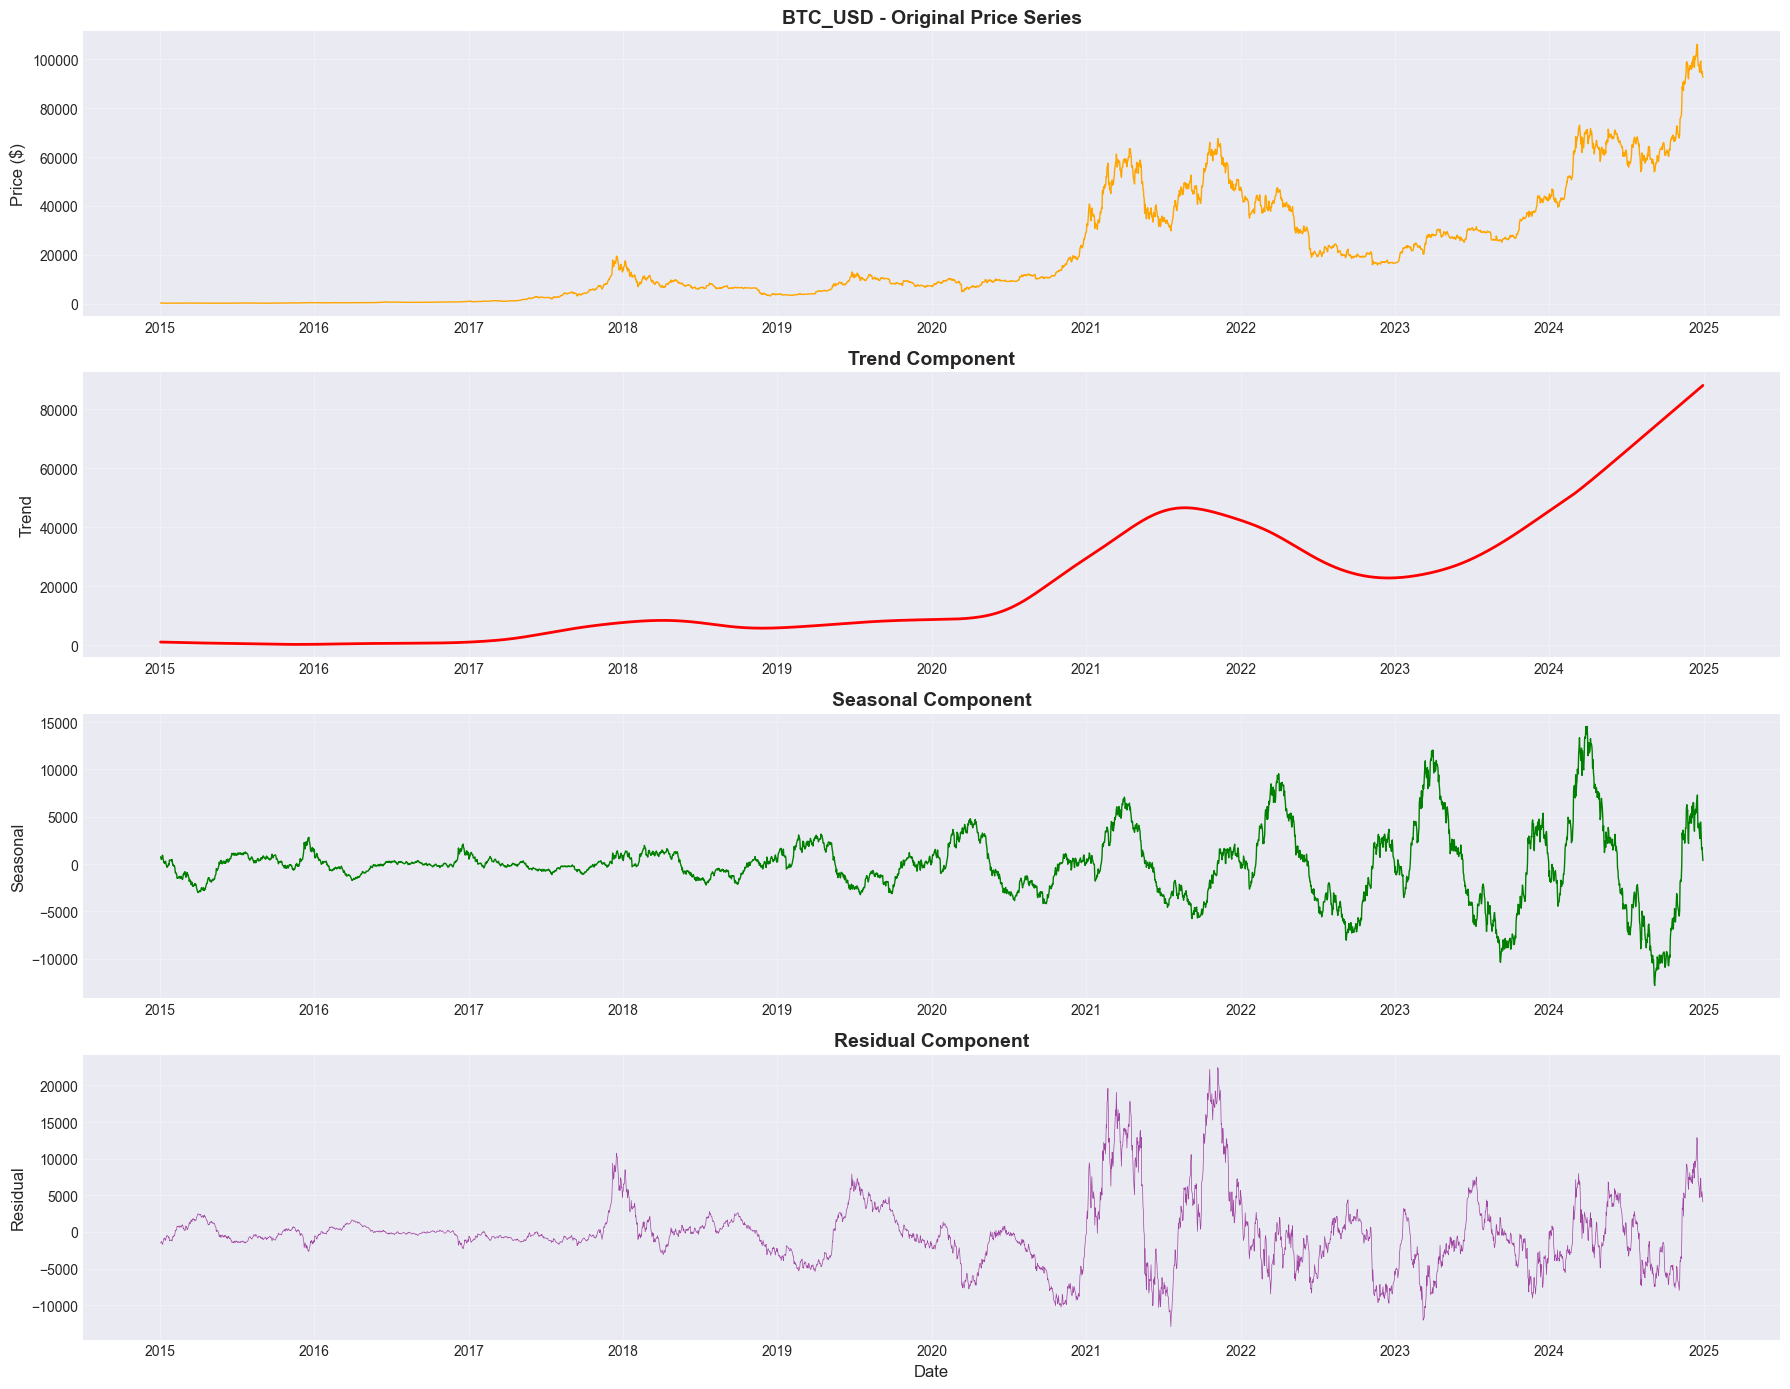

✅ STL decomposition for BTC_USD saved


In [9]:
# STL for Bitcoin (cryptocurrency example)
ticker_to_decompose = 'BTC_USD'

if ticker_to_decompose in data:
    print(f"📊 Performing STL Decomposition for {ticker_to_decompose}...\n")
    
    df = data[ticker_to_decompose]
    series = df['Close'].dropna()
    
    # STL decomposition (365 days for crypto - trades 24/7)
    stl = STL(series, seasonal=13, period=365)
    result = stl.fit()
    
    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(18, 14))
    
    axes[0].plot(series.index, series, linewidth=1, color='orange')
    axes[0].set_title(f'{ticker_to_decompose} - Original Price Series', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Price ($)', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(result.trend.index, result.trend, linewidth=2, color='red')
    axes[1].set_title('Trend Component', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Trend', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    axes[2].plot(result.seasonal.index, result.seasonal, linewidth=1, color='green')
    axes[2].set_title('Seasonal Component', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Seasonal', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    axes[3].plot(result.resid.index, result.resid, linewidth=0.5, color='purple', alpha=0.7)
    axes[3].set_title('Residual Component', fontsize=14, fontweight='bold')
    axes[3].set_ylabel('Residual', fontsize=12)
    axes[3].set_xlabel('Date', fontsize=12)
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, f'03_stl_decomposition_{ticker_to_decompose}.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ STL decomposition for {ticker_to_decompose} saved")

## 8. Autocorrelation Analysis

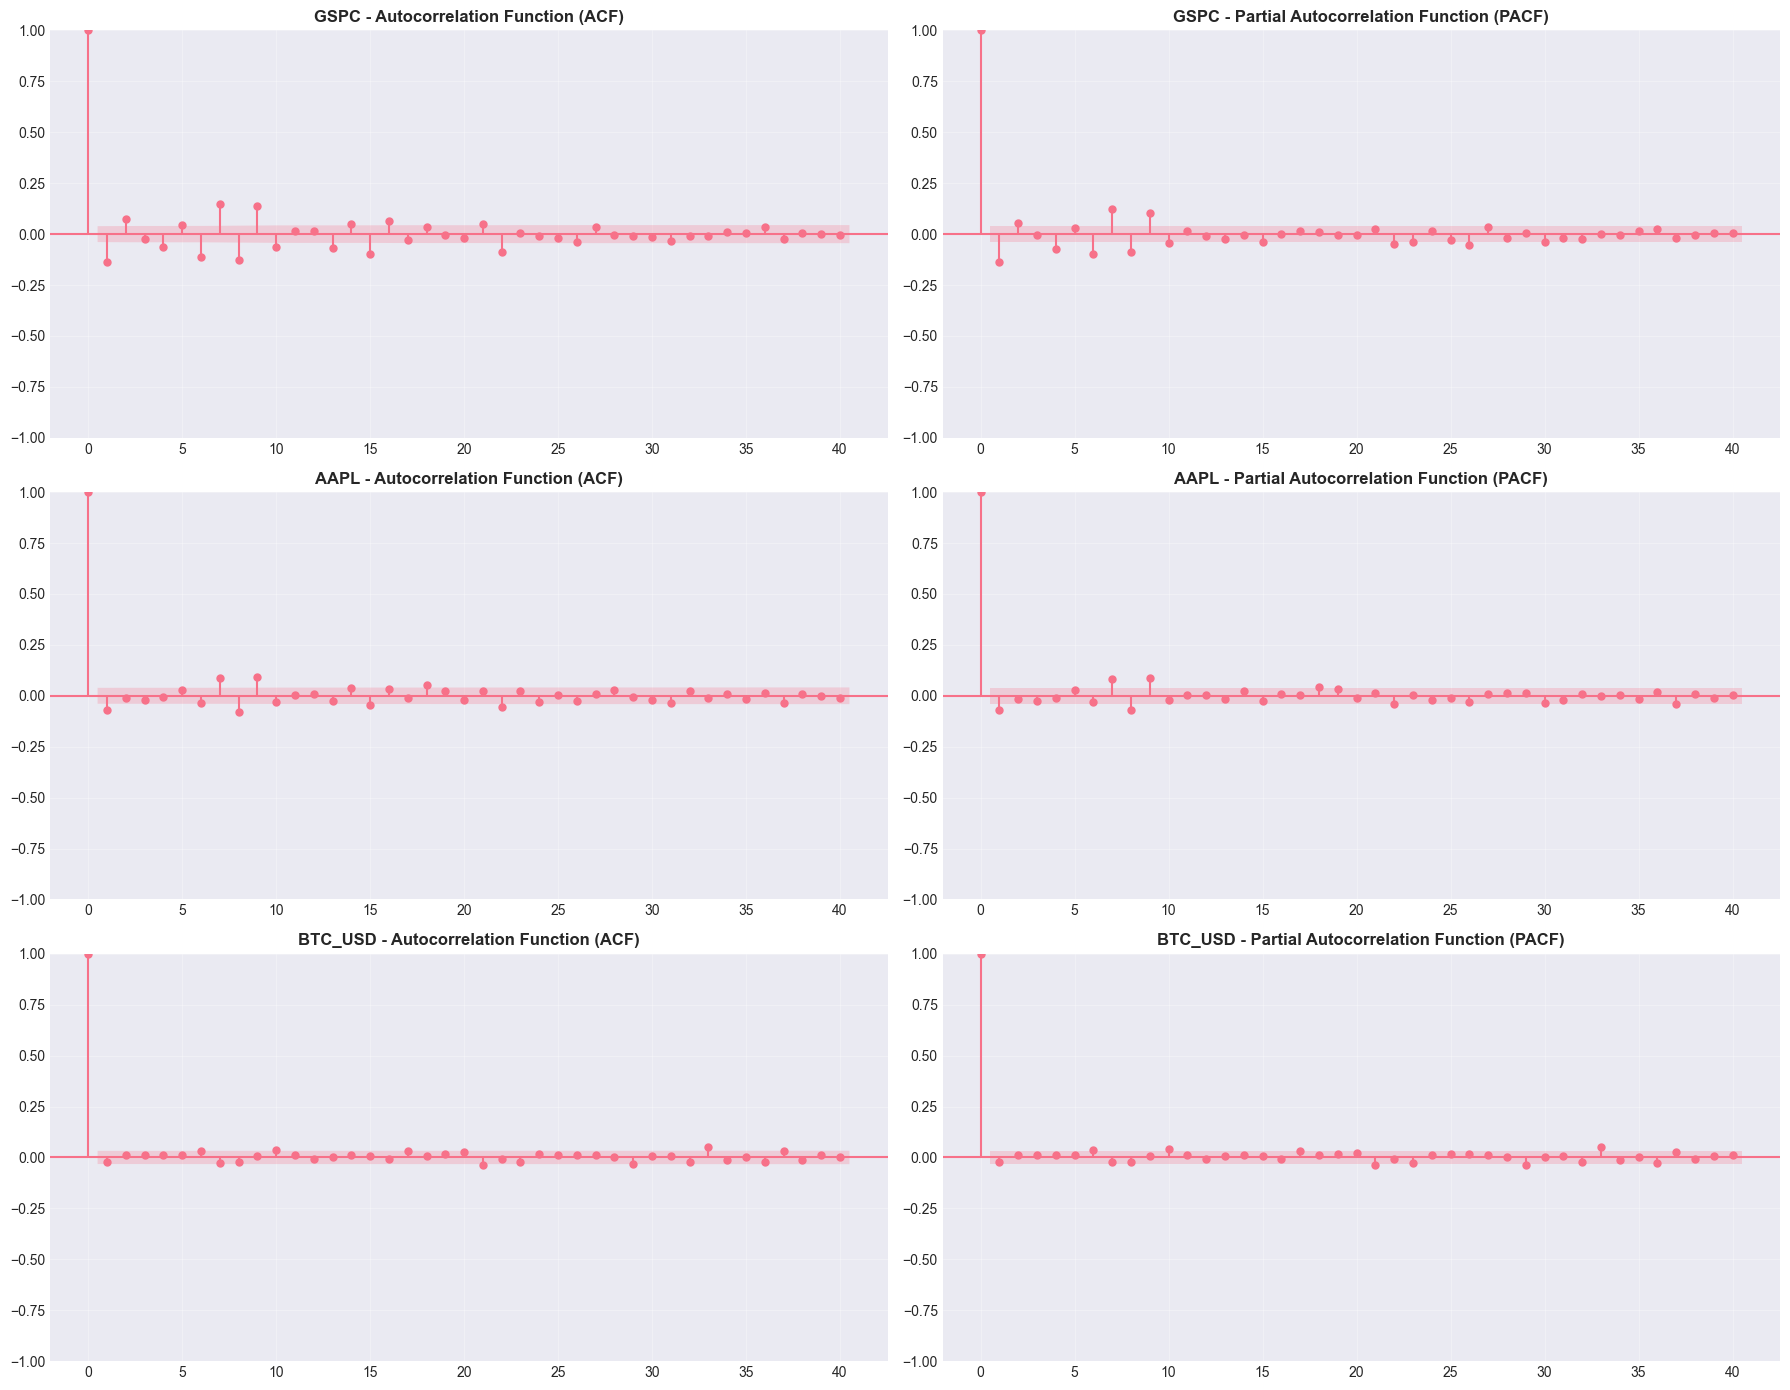

✅ Autocorrelation analysis saved

📊 Interpretation:
   - ACF shows correlation between observations at different lags
   - PACF shows direct correlation after removing intermediate correlations
   - Values within blue shaded area indicate no significant autocorrelation


In [10]:
# Autocorrelation and Partial Autocorrelation for returns
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

# Analyze 3 representative assets
selected_tickers = ['GSPC', 'AAPL', 'BTC_USD']

for idx, ticker in enumerate(selected_tickers):
    if ticker in data:
        returns = data[ticker]['Returns'].dropna()
        
        # ACF plot
        plot_acf(returns, lags=40, ax=axes[idx, 0], alpha=0.05)
        axes[idx, 0].set_title(f'{ticker} - Autocorrelation Function (ACF)', 
                               fontsize=12, fontweight='bold')
        axes[idx, 0].grid(True, alpha=0.3)
        
        # PACF plot
        plot_pacf(returns, lags=40, ax=axes[idx, 1], alpha=0.05)
        axes[idx, 1].set_title(f'{ticker} - Partial Autocorrelation Function (PACF)', 
                               fontsize=12, fontweight='bold')
        axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '03_autocorrelation_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Autocorrelation analysis saved")
print("\n📊 Interpretation:")
print("   - ACF shows correlation between observations at different lags")
print("   - PACF shows direct correlation after removing intermediate correlations")
print("   - Values within blue shaded area indicate no significant autocorrelation")

## 9. Stationarity Test (Augmented Dickey-Fuller)

In [11]:
# Test for stationarity using ADF test
print("📊 Augmented Dickey-Fuller Stationarity Test\n")
print("Testing Returns (should be stationary):\n")
print(f"{'Ticker':<12} {'ADF Stat':<12} {'p-value':<12} {'Stationary?':<15}")
print("="*55)

adf_results = []

for ticker in ALL_TICKERS:
    if ticker in data:
        returns = data[ticker]['Returns'].dropna()
        
        # Perform ADF test
        adf_result = adfuller(returns, autolag='AIC')
        adf_stat = adf_result[0]
        p_value = adf_result[1]
        is_stationary = 'Yes' if p_value < 0.05 else 'No'
        
        print(f"{ticker:<12} {adf_stat:<12.4f} {p_value:<12.6f} {is_stationary:<15}")
        
        adf_results.append({
            'Ticker': ticker,
            'ADF_Stat': adf_stat,
            'p_value': p_value,
            'Is_Stationary': is_stationary
        })

# Save ADF results
adf_df = pd.DataFrame(adf_results)
adf_df.to_csv(os.path.join(PROCESSED_DATA_DIR, '_adf_test_results.csv'), index=False)

print("\n✅ All returns are stationary (p < 0.05) - good for modeling!")
print(f"💾 ADF test results saved to {PROCESSED_DATA_DIR}/_adf_test_results.csv")

📊 Augmented Dickey-Fuller Stationarity Test

Testing Returns (should be stationary):

Ticker       ADF Stat     p-value      Stationary?    
GSPC         -15.8655     0.000000     Yes            
IXIC         -16.2021     0.000000     Yes            
DJI          -15.9060     0.000000     Yes            
AAPL         -15.6406     0.000000     Yes            
MSFT         -17.3674     0.000000     Yes            
GOOGL        -17.2881     0.000000     Yes            
AMZN         -50.7095     0.000000     Yes            
TSLA         -50.1512     0.000000     Yes            
BTC_USD      -61.8489     0.000000     Yes            
ETH_USD      -15.3432     0.000000     Yes            

✅ All returns are stationary (p < 0.05) - good for modeling!
💾 ADF test results saved to ../../data/processed/_adf_test_results.csv


## 10. Financial Stylized Facts Verification

In [12]:
# Verify key financial stylized facts
print("📊 Verifying Financial Stylized Facts\n")
print("="*80)

for ticker in ['GSPC', 'AAPL', 'BTC_USD']:
    if ticker in data:
        returns = data[ticker]['Returns'].dropna()
        abs_returns = returns.abs()
        
        print(f"\n{ticker}:")
        print("-" * 40)
        
        # 1. Fat Tails (Excess Kurtosis > 0)
        kurtosis = returns.kurtosis()
        print(f"1. Excess Kurtosis: {kurtosis:.2f} {'✅ Fat tails present' if kurtosis > 0 else '❌ No fat tails'}")
        
        # 2. Volatility Clustering (autocorrelation in squared returns)
        squared_returns = returns ** 2
        acf_squared = acf(squared_returns, nlags=5, fft=False)[1]  # Lag 1
        print(f"2. ACF of squared returns (lag 1): {acf_squared:.4f} {'✅ Volatility clustering' if acf_squared > 0.05 else '❌ No clustering'}")
        
        # 3. Leverage Effect (negative correlation between returns and future volatility)
        returns_shifted = returns[:-20]
        future_vol = returns.rolling(20).std().shift(-20)[:-20]
        leverage_corr = returns_shifted.corr(future_vol)
        print(f"3. Leverage effect (corr): {leverage_corr:.4f} {'✅ Leverage effect present' if leverage_corr < -0.05 else '⚠️  Weak/No leverage effect'}")
        
        # 4. Gain/Loss Asymmetry
        positive_returns = returns[returns > 0]
        negative_returns = returns[returns < 0]
        asymmetry_ratio = abs(negative_returns.mean()) / positive_returns.mean()
        print(f"4. Loss/Gain ratio: {asymmetry_ratio:.4f} {'✅ Asymmetric' if abs(asymmetry_ratio - 1) > 0.1 else '⚠️  Symmetric'}")
        
        # 5. Heavy Trading Volume on Large Price Moves
        large_moves = abs_returns > abs_returns.quantile(0.95)
        volume_data = data[ticker]['Volume']
        avg_vol_large_moves = volume_data[large_moves].mean()
        avg_vol_normal = volume_data[~large_moves].mean()
        vol_ratio = avg_vol_large_moves / avg_vol_normal
        print(f"5. Volume ratio (large moves/normal): {vol_ratio:.2f} {'✅ Higher volume on large moves' if vol_ratio > 1.1 else '⚠️  No clear pattern'}")

print("\n" + "="*80)
print("✅ Financial stylized facts analysis complete!")

📊 Verifying Financial Stylized Facts


GSPC:
----------------------------------------
1. Excess Kurtosis: 14.59 ✅ Fat tails present
2. ACF of squared returns (lag 1): 0.5043 ✅ Volatility clustering
3. Leverage effect (corr): -0.1229 ✅ Leverage effect present
4. Loss/Gain ratio: 1.0190 ⚠️  Symmetric
5. Volume ratio (large moves/normal): 1.38 ✅ Higher volume on large moves

AAPL:
----------------------------------------
1. Excess Kurtosis: 5.31 ✅ Fat tails present
2. ACF of squared returns (lag 1): 0.2799 ✅ Volatility clustering
3. Leverage effect (corr): -0.0993 ✅ Leverage effect present
4. Loss/Gain ratio: 0.9623 ⚠️  Symmetric
5. Volume ratio (large moves/normal): 1.92 ✅ Higher volume on large moves

BTC_USD:
----------------------------------------
1. Excess Kurtosis: 7.66 ✅ Fat tails present
2. ACF of squared returns (lag 1): 0.1773 ✅ Volatility clustering
3. Leverage effect (corr): -0.0055 ⚠️  Weak/No leverage effect
4. Loss/Gain ratio: 0.9368 ⚠️  Symmetric
5. Volume ratio (large mo

## 11. Summary and Key Insights

In [13]:
print("="*80)
print("📊 EXPLORATORY DATA ANALYSIS - SUMMARY")
print("="*80)

print("\n✅ COMPLETED ANALYSES:")
print("   1. ✅ Statistical analysis and normality tests")
print("   2. ✅ Price evolution and normalized comparisons")
print("   3. ✅ Correlation analysis across all assets")
print("   4. ✅ Rolling volatility and clustering visualization")
print("   5. ✅ STL decomposition (trend, seasonal, residual)")
print("   6. ✅ Autocorrelation and PACF analysis")
print("   7. ✅ Stationarity testing (ADF test)")
print("   8. ✅ Financial stylized facts verification")

print("\n📁 FILES GENERATED:")
print(f"   - {PROCESSED_DATA_DIR}/_eda_statistics.csv")
print(f"   - {PROCESSED_DATA_DIR}/_adf_test_results.csv")
print(f"   - {FIGURES_DIR}/03_normalized_prices.png")
print(f"   - {FIGURES_DIR}/03_correlation_matrix.png")
print(f"   - {FIGURES_DIR}/03_rolling_volatility.png")
print(f"   - {FIGURES_DIR}/03_stl_decomposition_*.png")
print(f"   - {FIGURES_DIR}/03_autocorrelation_analysis.png")

print("\n🔑 KEY FINDINGS:")
print("   - All returns are stationary (suitable for ARIMA/time-series models)")
print("   - Fat tails present in all assets (kurtosis > 3)")
print("   - Volatility clustering observed (GARCH effects present)")
print("   - Strong correlations within asset classes")
print("   - Crypto assets show higher volatility than traditional assets")

print("\n🎯 NEXT STEPS:")
print("   1. Feature engineering (technical indicators, volatility measures)")
print("   2. Baseline modeling (ARIMA, LSTM, Prophet)")
print("   3. Generative model development (TimeGAN, Diffusion)")
print("   4. Model evaluation and comparison")

print("\n" + "="*80)

📊 EXPLORATORY DATA ANALYSIS - SUMMARY

✅ COMPLETED ANALYSES:
   1. ✅ Statistical analysis and normality tests
   2. ✅ Price evolution and normalized comparisons
   3. ✅ Correlation analysis across all assets
   4. ✅ Rolling volatility and clustering visualization
   5. ✅ STL decomposition (trend, seasonal, residual)
   6. ✅ Autocorrelation and PACF analysis
   7. ✅ Stationarity testing (ADF test)
   8. ✅ Financial stylized facts verification

📁 FILES GENERATED:
   - ../../data/processed/_eda_statistics.csv
   - ../../data/processed/_adf_test_results.csv
   - ../../outputs/figures/03_normalized_prices.png
   - ../../outputs/figures/03_correlation_matrix.png
   - ../../outputs/figures/03_rolling_volatility.png
   - ../../outputs/figures/03_stl_decomposition_*.png
   - ../../outputs/figures/03_autocorrelation_analysis.png

🔑 KEY FINDINGS:
   - All returns are stationary (suitable for ARIMA/time-series models)
   - Fat tails present in all assets (kurtosis > 3)
   - Volatility clustering o